<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>PROJETO 02</center>
<center>ALUNO:  Daniel Barbosa Vasconcelos</center>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

<div class="alert alert-block alert-info">
<strong> (1) Preparação dos dados para a análise<strong>
<div>

<div class="alert alert-block alert-info">
    (a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos
registros policiais estão catalogados;
<div>

In [3]:
dados_policia = pd.read_csv("/home/daniel/Codigos/estatistica/projeto II/police.csv")
dados_policia

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [4]:
dados = [(len(dados_policia.columns)),
         (len(dados_policia.index))]

variaveis_regist = pd.DataFrame((dados),
                                index =['Variaveis', 'registros policiais'])
variaveis_regist

,0
Variaveis,15
registros policiais,91741


<div class="alert alert-block alert-info">
    (b) Conte o número de dados faltosos de cada variável;
<div>

In [5]:
dados_policia.isnull().sum()


state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

<div class="alert alert-block alert-info">
    (c) Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;
<div>

In [6]:
dados_policia_efi = dados_policia.drop(columns=['county_name', 'state'])
dados_policia_efi

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


<div class="alert alert-block alert-info">
    (d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
Como apenas uma pequena fração das linhas está faltando driver_gender, remova
essas linhas do conjunto de dados;
<div>

In [7]:

dados_policia_efi.dropna(subset=["driver_gender"], inplace=True)
dados_policia_efi

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


<div class="alert alert-block alert-info">
    (e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted,
is_arrested e district; depois compare com os tipos de dados que estão armazena-dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis;
<div>

<h4>Enquanto search_conducted consta como booleana, is_arrested consta como objeto para o pandas, porém se trata do tipo bool.</h4>

In [8]:
# Transformando arested em bool
dados_policia_efi.is_arrested = dados_policia_efi.is_arrested.astype( 'bool' )
print(dados_policia_efi.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


<div class="alert alert-block alert-info">
    (f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:
stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeando-
a como stop_datetime e converta no formato data e hora (tipo datetime). Isso habi-
litará atributos baseados em data convenientes que usaremos posteriormente no projeto;
<div>


In [9]:
format = '%Y-%m-%d %H:%M:%S'
dados_policia_efi['stop_datetime'] = pd.to_datetime(dados_policia_efi['stop_date']
                                                    + " " + dados_policia_efi['stop_time'].astype("string"),
                                                    format=format)

<div class="alert alert-block alert-info">
    (g) Por fim, transforme a coluna stop_datetime no índice do dataframe.
<div>

In [10]:
dados_policia_efi = dados_policia_efi.set_index(pd.to_datetime(dados_policia_efi["stop_datetime"]))
dados_policia_efi

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00


<div class="alert alert-block alert-info">
2. Análise do gênero sobre as infrações<br>
O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito?<br>
Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito
mais!
<div>

<div class="alert alert-block alert-info">
    a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infra-
ções cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?
<div>

In [11]:
series_v = dados_policia_efi["violation"].value_counts()
vfreq = pd.DataFrame(series_v)
vfreq["Frequencia relativa"] = vfreq["violation"] / series_v.sum()
vfreq.loc["Total"] = [series_v.sum(),vfreq["Frequencia relativa"].sum()]
vfreq.rename(columns={'violation': 'Absoluta'},inplace=True)
vfreq

,Absoluta,Frequencia relativa
Speeding,48423.0,0.559571
Moving violation,16224.0,0.187483
Equipment,10921.0,0.126202
Other,4409.0,0.050950
Registration/plates,3703.0,0.042791
Seat belt,2856.0,0.033004
Total,86536.0,1.000000


<div class="alert alert-block alert-info">
    b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e femi-
nino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela
de contingência para frequência absoluta e outra para frequência relativa, contendo a
distribuição conjunta das variáveis driver_gender e violation.
<div>

In [12]:
df_homens = dados_policia_efi[dados_policia_efi["driver_gender"]=="M"]
homens = df_homens["violation"].value_counts()

df_mulheres = dados_policia_efi[dados_policia_efi["driver_gender"]=="F"]
mulheres = df_mulheres["violation"].value_counts()

hfreq = pd.DataFrame(homens)
hfreq["Frequencia Absoluta (Homens)"] = homens
hfreq["Frequencia Absoluta (Mulheres)"] = mulheres
hfreq.drop(["violation"],axis=1,inplace=True); 
hfreq

,Frequencia Absoluta (Homens),Frequencia Absoluta (Mulheres)
Speeding,32777,15646
Moving violation,12938,3286
Equipment,8420,2501
Other,3702,707
Registration/plates,2647,1056
Seat belt,2278,578


<div class="alert alert-block alert-info">
    (c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingên-
cia construídas;
<div>

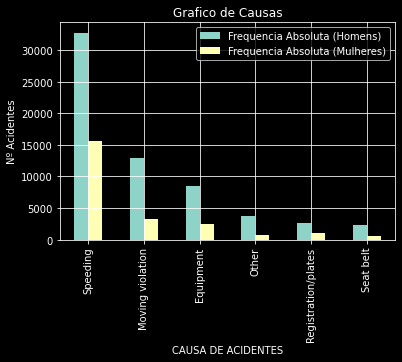

In [29]:
hfreq.plot.bar()
plt.title('Grafico de Causas')
plt.xlabel('CAUSA DE ACIDENTES')
plt.ylabel('Nº Acidentes')
plt.grid()

<div class="alert alert-block alert-info">
    (d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que
o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar
evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma
tabela de contingência considerando as variáveis driver_gender e stop_outcome e
então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um
"Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);
<div>

Aqui eu crio as duas frequencias e depois utiliso o .sort_index com o parâmetro ascending=False para organizar e mostrar de forma decrescente. Em seguida utilizo o pd.concat para unir as duas frequencias em um único df. Analisando o resultado, vemos que todos os casos apresentam mais casos envolvendo sexo masculino que o feminino, sendo que de todos os casos, o que ocorre com mais frequencia com ambos os sexos são os casos de Speeding



In [22]:
freq_abs = dados_policia_efi[['violation', 'driver_gender']].value_counts()
freq_rel = dados_policia_efi[['violation', 'driver_gender']].value_counts(normalize=True)

In [23]:
freq_abs = freq_abs.sort_index(ascending=False)
freq_rel = freq_rel.sort_index(ascending=False)

In [24]:
dist = pd.concat([freq_abs, freq_rel], axis=1)
dist.columns = ["freq_abs", 'freq_rel']
dist

freq_abs  freq_rel
violation           driver_gender                    
Speeding            M                 32777  0.378767
                    F                 15646  0.180803
Seat belt           M                  2278  0.026324
                    F                   578  0.006679
Registration/plates M                  2647  0.030588
                    F                  1056  0.012203
Other               M                  3702  0.042780
                    F                   707  0.008170
Moving violation    M                 12938  0.149510
                    F                  3286  0.037973
Equipment           M                  8420  0.097301
                    F                  2501  0.028901

<div class="alert alert-block alert-info">
    (e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta,
primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em
uma revista de veículo
<div>

In [33]:
dist3 = dados_policia_efi[['search_conducted', 'driver_gender']].astype('object').value_counts()
dist3 = dist3.sort_index(ascending=False)
dist3

search_conducted  driver_gender
True              M                 2851
                  F                  456
False             M                59911
                  F                23318
dtype: int64

O resultado mostra que o sexo masculino é o que foi mais revistado com uma diferença grande
quando comparado as vezes em que o sexo feminino  foi revistado

<div class="alert alert-block alert-info">
    (f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo
tempo usando groupby;
<div>

In [36]:
mulheres = df_mulheres["stop_outcome"].value_counts()
mulheres = pd.DataFrame(mulheres)
mulheres.rename(columns={"stop_outcome":"Absoluta (Mulheres)"},inplace=True)

paradas = pd.concat([df_homens["stop_outcome"].value_counts(), mulheres],axis=1)
paradas.rename(columns={"stop_outcome":"Absoluta (Homens)"},inplace=True)
paradas = paradas.head(2)

paradas["Frequencia relativa (Homens)"] = paradas["Absoluta (Homens)"] / paradas["Absoluta (Homens)"].sum()
paradas["Frequencia relativa (Mulheres)"] = paradas["Absoluta (Mulheres)"] / paradas["Absoluta (Mulheres)"].sum()
paradas

,Absoluta (Homens),Absoluta (Mulheres),Frequencia relativa (Homens),Frequencia relativa (Mulheres)
Citation,55840,21251,0.938629,0.934685
Warning,3651,1485,0.061371,0.065315


<div class="alert alert-block alert-info">
    (g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infra-
ção, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?
<div>

In [40]:
rltv_m = df_mulheres.loc[df_mulheres["search_conducted"]==True]
rltv_m = rltv_m["violation"].value_counts(normalize=True)*100

rltv_h = df_homens.loc[df_homens["search_conducted"]==True]
rltv_h = rltv_h["violation"].value_counts(normalize=True)*100

df_rltv = pd.DataFrame([rltv_h,rltv_m],index={"Mulheres","Homens"})
df_rltv

,Speeding,Moving violation,Equipment,Registration/plates,Other,Seat belt
Mulheres,32.058927,27.920028,21.115398,10.101719,5.997895,2.806033
Homens,28.508772,28.289474,21.929825,12.719298,6.359649,2.192982


<div class="alert alert-block alert-info">
    <strong>   3. Análise exploratória visual dos dados<br>
É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas
às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões anali-
sando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender
as tendências de uma forma que o exame dos dados brutos não pode.
<div>

<div class="alert alert-block alert-info">
    (a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em
todas as paradas no DataFrame, calculando a média da coluna is_arrested ;
<div>

In [42]:
dados_policia_efi['is_arrested'].value_counts(normalize=True)*100

False    96.443099
True      3.556901
Name: is_arrested, dtype: float64

<div class="alert alert-block alert-info">
    (b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate
com os valores encontrados da taxa de prisão por hora;
<div>

In [43]:
df1 = dados_policia_efi
df1['stop_time'] = pd.to_datetime(df1['stop_time'])
df1 = df1.set_index('stop_time')

taxa_hrs = df1['is_arrested']
dftaxa = pd.DataFrame(taxa_hrs)
dftaxa = dftaxa.loc[dftaxa['is_arrested']==True]
dftaxa = dftaxa.groupby(pd.Grouper(freq='H')).sum()
hourly_arrest_rate = (dftaxa / dftaxa.sum()) * 100
hourly_arrest_rate

,is_arrested
stop_time,
2022-08-05 00:00:00,8.057180
2022-08-05 01:00:00,8.512021
2022-08-05 02:00:00,5.295647
2022-08-05 03:00:00,2.079272
2022-08-05 04:00:00,0.389864
2022-08-05 05:00:00,0.259909
2022-08-05 06:00:00,1.397011
2022-08-05 07:00:00,1.851852
2022-08-05 08:00:00,3.508772


In [44]:
hourly_arrest_rate.mean()

is_arrested    4.166667
dtype: float64

<div class="alert alert-block alert-info">
    (c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando
o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora
do Dia;
<div>

Text(0.5, 1.0, 'Taxa de Prisões por Hora do Dia')

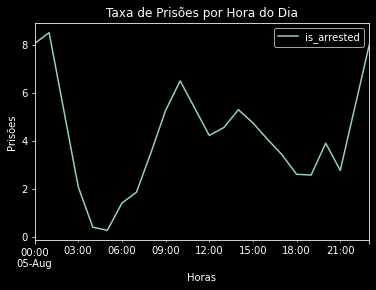

In [45]:
hourly_arrest_rate.plot()
plt.ylabel("Prisões")
plt.xlabel("Horas")
plt.title("Taxa de Prisões por Hora do Dia")

<div class="alert alert-block alert-info">
    (d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;
<div>

In [46]:
taxa_drogas = dados_policia_efi['drugs_related_stop']
dftaxa = pd.DataFrame(taxa_drogas)
dftaxa = dftaxa.loc[dftaxa['drugs_related_stop']==True]

annual_drug_rate = dftaxa.groupby(pd.Grouper(freq='Y')).sum()
annual_drug_rate = (annual_drug_rate/annual_drug_rate.sum())*100
annual_drug_rate

,drugs_related_stop
stop_datetime,
2005-12-31,1.856148
2006-12-31,8.468677
2007-12-31,8.352668
2008-12-31,7.192575
2009-12-31,8.236659
2010-12-31,8.352668
2011-12-31,8.700696
2012-12-31,11.948956
2013-12-31,11.484919


<div class="alert alert-block alert-info">
    e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminui-
ção das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo. Para isso, calcule a taxa de pesquisa anual eamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;
<div>

<AxesSubplot:xlabel='stop_datetime'>

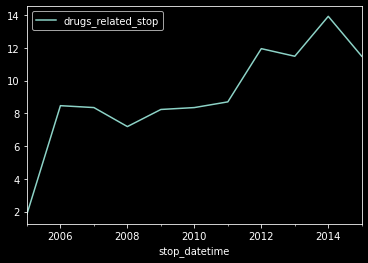

In [47]:
annual_drug_rate.plot()

<div class="alert alert-block alert-info">
    (f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados
obtido na tabela, e responda a questão colocada
<div>

In [48]:
taxa_abd = dados_policia_efi['search_conducted']
df_abd = pd.DataFrame(taxa_abd)
df_abd = df_abd.loc[df_abd['search_conducted']==True]

annual_search_rate = df_abd.groupby(pd.Grouper(freq='Y')).sum()
annual_search_rate = (annual_search_rate/annual_search_rate.sum())*100
annual_search_rate

,search_conducted
stop_datetime,
2005-12-31,3.658905
2006-12-31,12.700333
2007-12-31,12.035077
2008-12-31,10.069549
2009-12-31,10.825522
2010-12-31,9.676444
2011-12-31,8.315694
2012-12-31,10.553372
2013-12-31,6.864227


In [49]:
drogas_abd = pd.concat([annual_drug_rate,annual_search_rate], axis=1)
drogas_abd

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,1.856148,3.658905
2006-12-31,8.468677,12.700333
2007-12-31,8.352668,12.035077
2008-12-31,7.192575,10.069549
2009-12-31,8.236659,10.825522
2010-12-31,8.352668,9.676444
2011-12-31,8.700696,8.315694
2012-12-31,11.948956,10.553372
2013-12-31,11.484919,6.864227


<AxesSubplot:xlabel='stop_datetime'>

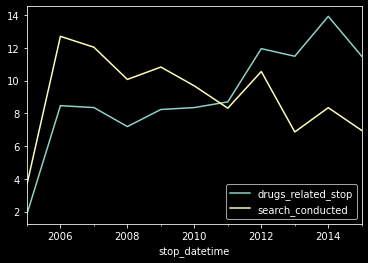

In [50]:
drogas_abd.plot()

<h2> Comparação de Discritos e Zonas

In [53]:
pd.crosstab(dados_policia_efi['district'],
            dados_policia_efi['violation'])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


<AxesSubplot:>

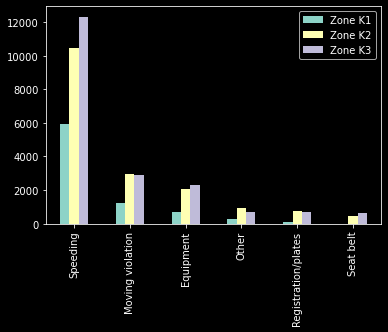

In [56]:
k1 = dados_policia_efi.loc[dados_policia_efi['district']=='Zone K1']
k1 = pd.DataFrame(k1['violation'].value_counts())
k1.rename(columns={'violation': 'Zone K1'}, inplace=True)

k2 = dados_policia_efi.loc[dados_policia_efi['district']=='Zone K2']
k2 = pd.DataFrame(k2['violation'].value_counts())
k2.rename(columns={'violation': 'Zone K2'}, inplace=True)

k3 = dados_policia_efi.loc[dados_policia_efi['district']=='Zone K3']
k3 = pd.DataFrame(k3['violation'].value_counts())
k3.rename(columns={'violation': 'Zone K3'}, inplace=True)
graf = pd.concat([k1,k2,k3], axis=1)
graf.plot.bar()

<div class="alert alert-block alert-info">
4. Analisando o efeito do clima no policiamento
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.
<div>
   

In [57]:
df2 = pd.read_csv('weather.csv')

In [58]:
tmin = df2.groupby('TMIN').describe()
tmin

TAVG                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TMIN                                                                    
-5     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   1.0   
-3     3.0   8.000000  2.000000   6.0   7.00   8.0   9.00  10.0   3.0   
-2     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   2.0   
-1     3.0  15.333333  4.041452  13.0  13.00  13.0  16.50  20.0   3.0   
 0     2.0   9.500000  0.707107   9.0   9.25   9.5   9.75  10.0   2.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
 73    8.0  80.125000  2.900123  76.0  77.75  80.5  82.25  84.0  21.0   
 74    3.0  82.333333  1.527525  81.0  81.50  82.0  83.00  84.0  10.0   
 75    4.0  83.500000  1.290994  82.0  82.75  83.5  84.25  85.0  10.0   
 76    2.0  84.500000  0.707107  84.0  84.25  84.5  84.75  85.0   5.0   
 77    2.0  85.000000  1.414214  84.0  84.50  85.0  85.50  86.0   3.0   

                 ... WT21      WT22                                    
           mean  ...  75% max count mean std  min  25%  50%  75%  max  
TMIN             ...                                                   
-5    34.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-3    22.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-2    21.500000  ...  NaN NaN   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
-1    24.666667  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 0    20.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ..   ...  ...  ..  ...  ...  ...  ...  ...  
 73   89.476190  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 74   91.200000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 75   92.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 76   95.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 77   98.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  

[82 rows x 192 columns]

In [59]:
tavg = df2.groupby(['TAVG']).describe()
tavg

TMIN                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TAVG                                                                    
6.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
8.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
9.0    2.0   1.000000  1.414214   0.0   0.50   1.0   1.50   2.0   2.0   
10.0   2.0  -1.500000  2.121320  -3.0  -2.25  -1.5  -0.75   0.0   2.0   
11.0   3.0   3.666667  2.081666   2.0   2.50   3.0   4.50   6.0   3.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
82.0   6.0  71.500000  3.016621  67.0  70.00  71.5  73.75  75.0   6.0   
83.0   3.0  73.333333  1.527525  72.0  72.50  73.0  74.00  75.0   3.0   
84.0   5.0  75.000000  1.581139  73.0  74.00  75.0  76.00  77.0   5.0   
85.0   2.0  75.500000  0.707107  75.0  75.25  75.5  75.75  76.0   2.0   
86.0   1.0  77.000000       NaN  77.0  77.00  77.0  77.00  77.0   1.0   

                 ... WT21      WT22                               
           mean  ...  75% max count mean std min 25% 50% 75% max  
TAVG             ...                                              
6.0   18.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
8.0   20.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
9.0   18.500000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
10.0  24.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
11.0  17.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...         ...  ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
82.0  93.166667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
83.0  92.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
84.0  94.800000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
85.0  95.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
86.0  98.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[80 rows x 192 columns]

In [60]:
tmax = df2.groupby('TMAX').describe()
tmax

TAVG                                                   TMIN             \
     count   mean       std   min    25%   50%    75%   max count       mean   
TMAX                                                                           
15     1.0  11.00       NaN  11.0  11.00  11.0  11.00  11.0   2.0   4.500000   
16     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0   3.500000   
17     1.0   9.00       NaN   9.0   9.00   9.0   9.00   9.0   3.0   6.666667   
18     4.0  10.25  2.872281   6.0   9.75  11.5  12.00  12.0   5.0   3.400000   
19     2.0  14.50  3.535534  12.0  13.25  14.5  15.75  17.0   3.0   7.666667   
...    ...    ...       ...   ...    ...   ...    ...   ...   ...        ...   
98     1.0  86.00       NaN  86.0  86.00  86.0  86.00  86.0   2.0  74.000000   
99     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  72.000000   
100    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0  76.500000   
101    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  76.000000   
102    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  73.000000   

      ... WT21      WT22                               
      ...  75% max count mean std min 25% 50% 75% max  
TMAX  ...                                              
15    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
16    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
17    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
18    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
19    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...   ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
98    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
99    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
100   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
101   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
102   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[88 rows x 192 columns]

<AxesSubplot:>

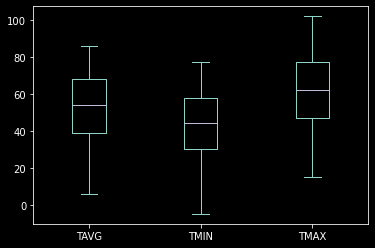

In [61]:
df2[['TAVG','TMIN','TMAX']].plot.box()

<h3>Diferença entre as temperaturas:

</h3>

<AxesSubplot:>

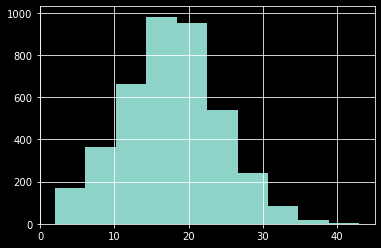

In [62]:
df2['TDIFF'] = df2['TMAX']-df2['TMIN']
df2['TDIFF'].hist()

In [63]:
dados_policia_efi['reset_index'] = dados_policia_efi.index
dados_policia_efi = dados_policia_efi.reset_index(drop=True)

In [64]:
date = df2['DATE']
date = pd.to_datetime(date)

In [66]:
df3 = dados_policia_efi.merge(df2, right_index=True, left_index=True, how='outer')

In [67]:
df3.set_index('reset_index', inplace=True)
df3

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
reset_index,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,2022-08-05 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
2005-01-23 23:15:00,2005-01-23,2022-08-05 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16.0
2005-02-17 04:15:00,2005-02-17,2022-08-05 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.0
2005-02-20 17:15:00,2005-02-20,2022-08-05 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0
2005-02-24 01:20:00,2005-02-24,2022-08-05 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,2022-08-05 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 21:59:00,2015-12-31,2022-08-05 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 22:04:00,2015-12-31,2022-08-05 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
